# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = study_results.merge(mouse_metadata, on='Mouse ID', how='left')
df = data.copy()
# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [270]:
# Checking the number of mice.
len(data["Mouse ID"].unique())


249

In [271]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_data= data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate = duplicate_mice_data['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [272]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [273]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data =  data.drop(data[data['Mouse ID'] == duplicate[0]].index)
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [274]:
# Checking the number of mice in the clean DataFrame.
len(data["Mouse ID"].unique())

248

## Summary Statistics

In [275]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = data.groupby('Drug Regimen')
stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
sem = grouped['Tumor Volume (mm3)'].sem().rename('SEM')
stats = pd.concat([stats, sem], axis=1)
stats = stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'SEM': 'Tumor Volume Std. Err.'
})
stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [276]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',median='median',var='var',std='std',SEM='sem')
stats

,mean,median,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

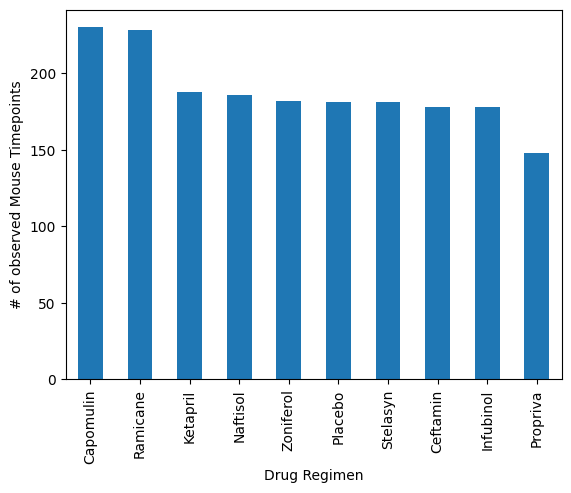

In [277]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and calculate the count of rows (Mouse ID/Timepoints)
data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

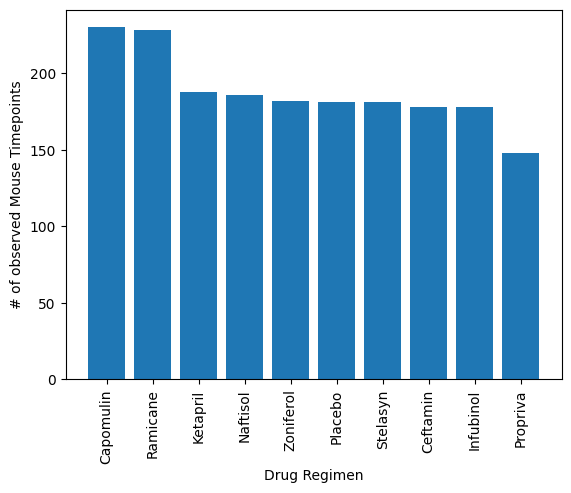

In [278]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_for_plot = data.groupby('Drug Regimen')['Mouse ID'].count()
data_for_plot = pd.DataFrame({'Drug Regimen': data_for_plot.index, 'Total Rows': data_for_plot.values})
data_for_plot = data_for_plot.sort_values(by='Total Rows', ascending=False)
plt.bar(data_for_plot['Drug Regimen'], data_for_plot['Total Rows'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

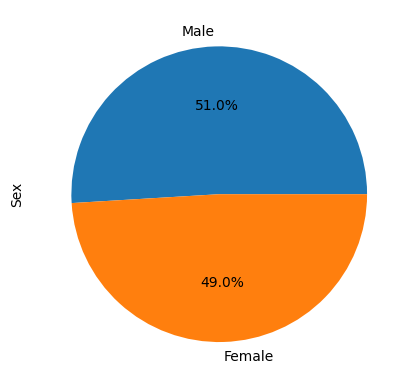

In [279]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

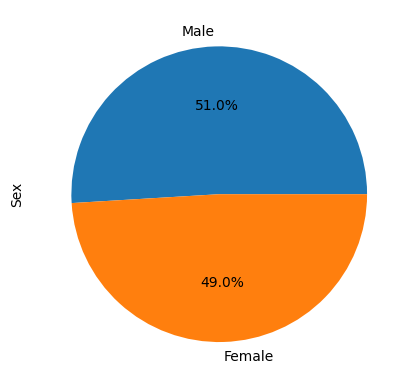

In [280]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart = data['Sex'].value_counts()
plt.pie(pie_chart, labels=pie_chart.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [281]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoints = data.groupby('Mouse ID')['Timepoint'].max()
data = data.merge(last_timepoints, on=['Mouse ID', 'Timepoint'])
data = data[data['Drug Regimen'].isin(treatment_regimens)]

In [282]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for i in treatment_regimens:
    regimen_data = data[data['Drug Regimen'] == i ]
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{i}'s potential outliers:{outliers}")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


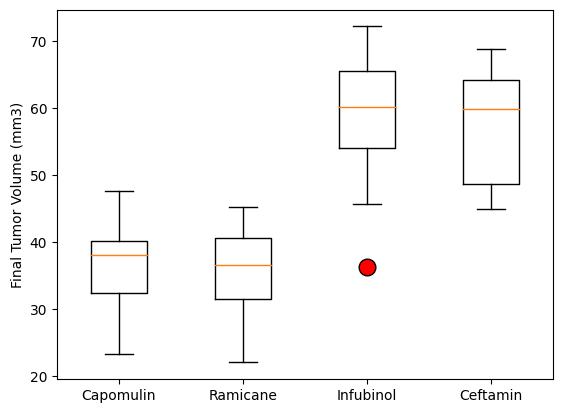

In [283]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

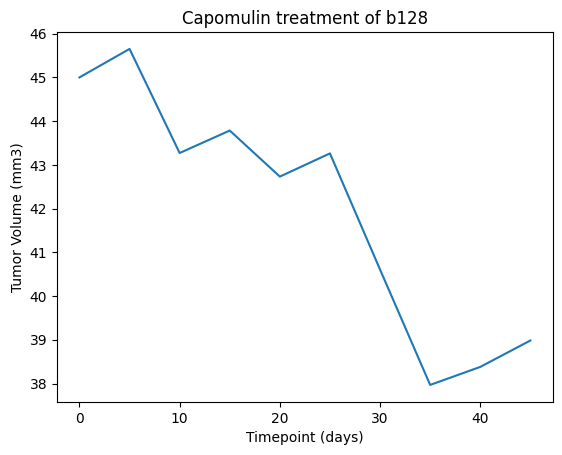

In [284]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = "b128"
line = df[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == "b128")]
plt.plot(line['Timepoint'], line['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of {single_mouse}')
plt.show()

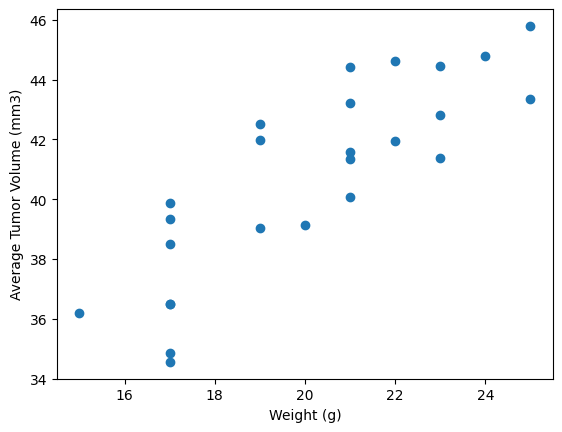

In [285]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter = df[(df['Drug Regimen'] == 'Capomulin')]
average_tumor_volume = scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = scatter.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


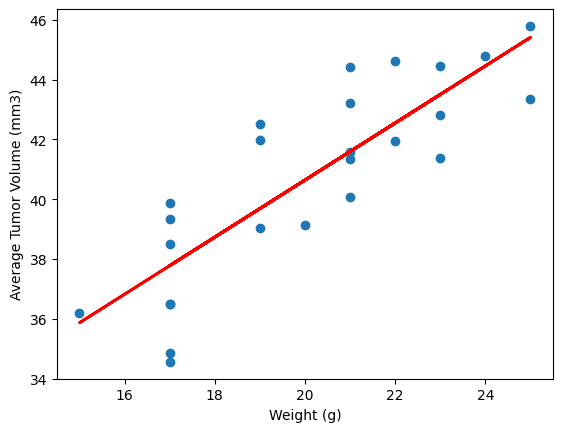

In [286]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = average_tumor_volume.corr(mouse_weights)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)
regression= slope * mouse_weights + intercept
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, regression, color='red', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
